<a href="https://colab.research.google.com/github/NORDIN16/PDF_Analysis/blob/master/Budget_economique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Tables detection and extraction

Step 1 :install the PaddlePaddle deep learning framework and its OCR toolkit

**PaddlePaddle**: is an open-source deep learning framework. It is designed to provide high-performance, flexible, and scalable deep learning capabilities

**PaddleOCR toolkit**: which is built on top of PaddlePaddle. PaddleOCR is a comprehensive OCR toolkit that supports text detection, text recognition ...



In [ ]:
!pip install paddlepaddle-gpu
!pip install paddleocr

In [ ]:
!wget http://archive.ubuntu.com/ubuntu/pool/main/o/openssl/libssl1.1_1.1.0g-2ubuntu4_amd64.deb
!sudo dpkg -i libssl1.1_1.1.0g-2ubuntu4_amd64.deb

--2024-03-14 13:17:30--  http://archive.ubuntu.com/ubuntu/pool/main/o/openssl/libssl1.1_1.1.0g-2ubuntu4_amd64.deb
Resolving archive.ubuntu.com (archive.ubuntu.com)... 91.189.91.81, 185.125.190.39, 91.189.91.83, ...
Connecting to archive.ubuntu.com (archive.ubuntu.com)|91.189.91.81|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1128092 (1.1M) [application/vnd.debian.binary-package]
Saving to: ‘libssl1.1_1.1.0g-2ubuntu4_amd64.deb.1’

libssl1.1_1.1.0g-2u 100%[===================>]   1.08M  --.-KB/s    in 0.08s   

2024-03-14 13:17:30 (13.1 MB/s) - ‘libssl1.1_1.1.0g-2ubuntu4_amd64.deb.1’ saved [1128092/1128092]

(Reading database ... 121791 files and directories currently installed.)
Preparing to unpack libssl1.1_1.1.0g-2ubuntu4_amd64.deb ...
Unpacking libssl1.1:amd64 (1.1.0g-2ubuntu4) over (1.1.0g-2ubuntu4) ...
Setting up libssl1.1:amd64 (1.1.0g-2ubuntu4) ...
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so t

clone the PaddleOCR repository from GitHub

In [ ]:
!git clone https://github.com/PaddlePaddle/PaddleOCR

fatal: destination path 'PaddleOCR' already exists and is not an empty directory.


In [ ]:
from paddleocr import PaddleOCR, draw_ocr

/usr/local/lib/python3.10/dist-packages/paddle/base/framework.py:688: UserWarning: You are using GPU version Paddle, but your CUDA device is not set properly. CPU device will be used by default.
  warnings.warn(


In [ ]:
!ls

libssl1.1_1.1.0g-2ubuntu4_amd64.deb  sample_data


**LayoutParser** : a Python library used for performing layout analysis on document images. It helps in extracting structured information such as text, tables, and other elements from documents by analyzing their layout.

In [ ]:
!pip install -U layoutparser


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.2/19.2 MB 33.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.4/56.4 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 71.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 85.1 MB/s eta 0:00:00
  Created wheel for iopath: filename=iopath-0.1.10-py3-none-any.whl size=31532 sha256=74be742422f783c2838976f67cf65d23cfa8702dcec6b7f3c6050ebebfbdd2f6
  Stored in directory: /root/.cache/pip/wheels/9a/a3/b6/ac0fcd1b4ed5cfeb3db92e6a0e476cfd48ed0df92b91080c1d
Successfully built iopath


**Detectron** : an open-source project developed by Facebook AI Research (FAIR) for object detection and segmentation tasks in computer vision.

In [ ]:
!pip install 'git+https://github.com/facebookresearch/detectron2.git@v0.4#egg=detectron2'


  Cloning https://github.com/facebookresearch/detectron2.git (to revision v0.4) to /tmp/pip-install-0uocjdi7/detectron2_8de4c0aa3495455f871ff2a9ec75bc25
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-install-0uocjdi7/detectron2_8de4c0aa3495455f871ff2a9ec75bc25
  Running command git checkout -q 4aca4bdaa9ad48b8e91d7520e0d0815bb8ca0fb1
  Resolved https://github.com/facebookresearch/detectron2.git to commit 4aca4bdaa9ad48b8e91d7520e0d0815bb8ca0fb1
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.5/47.5 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 13.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for detectron2: filename=detectron2-0.4-cp310-cp310-linux_x86_64.whl size=5672625 sha256=f69818f94fb3

Installing layoutparser with its optional dependencies for Optical Character Recognition (OCR) functionality

In [ ]:
!pip install layoutparser[ocr]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 435.0/435.0 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.4/120.4 kB 15.8 MB/s eta 0:00:00
  Attempting uninstall: google-api-core
    Found existing installation: google-api-core 2.11.1
    Uninstalling google-api-core-2.11.1:
      Successfully uninstalled google-api-core-2.11.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-gbq 0.19.2 requires google-api-core<3.0.0dev,>=2.10.2, but you have google-api-core 1.34.1 which is incompatible.


In [ ]:
!git clone https://github.com/Layout-Parser/layout-parser.git

Cloning into 'layout-parser'...
remote: Enumerating objects: 1357, done.
remote: Counting objects: 100% (400/400), done.
remote: Compressing objects: 100% (134/134), done.
remote: Total 1357 (delta 341), reused 272 (delta 264), pack-reused 957
Receiving objects: 100% (1357/1357), 62.86 MiB | 24.56 MiB/s, done.
Resolving deltas: 100% (739/739), done.


In [ ]:
!pip install pdf2image
!apt-get update
!apt-get install poppler-utils

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [109 kB]
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [736 kB]
Hit:8 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [1,848 kB]
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 http://archive.ubuntu.com

In [ ]:
from PIL import Image
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf

In [ ]:
from pdf2image import convert_from_path

In [ ]:
images = convert_from_path('sample_data/Budget_economique.pdf')

In [ ]:
!mkdir pages

In [ ]:
for i in range(len(images)):
  images[i].save('pages/page'+str(i)+'.jpg', 'JPEG')

In [ ]:
%cd layout-parser/

/content/layout-parser


In [ ]:
ls

layout-parser/  libssl1.1_1.1.0g-2ubuntu4_amd64.deb  pages/  sample_data/


In [ ]:
import cv2
image = cv2.imread("pages/page19.jpg")
image = image[..., ::-1]

In [ ]:
import layoutparser as lp


In [ ]:
model = lp.Detectron2LayoutModel('lp://PubLayNet/mask_rcnn_X_101_32x8d_FPN_3x/config',extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.65],
                                 label_map={0: "Text", 1: "Title", 2: "List", 3:"Table", 4:"Figure"})

layout = model.detect(image) # You need to load the image somewhere else, e.g., image = cv2.imread(...)

config.yaml?dl=1: 8.19kB [00:01, 8.13kB/s]
model_final.pth?dl=1: 856MB [00:09, 89.7MB/s]                          


In [ ]:
layout

Layout(_blocks=[TextBlock(block=Rectangle(x_1=107.44440460205078, y_1=279.161376953125, x_2=1591.5296630859375, y_2=1824.097412109375), text=None, id=None, type=Table, parent=None, next=None, score=0.9507838487625122)], page_data={})

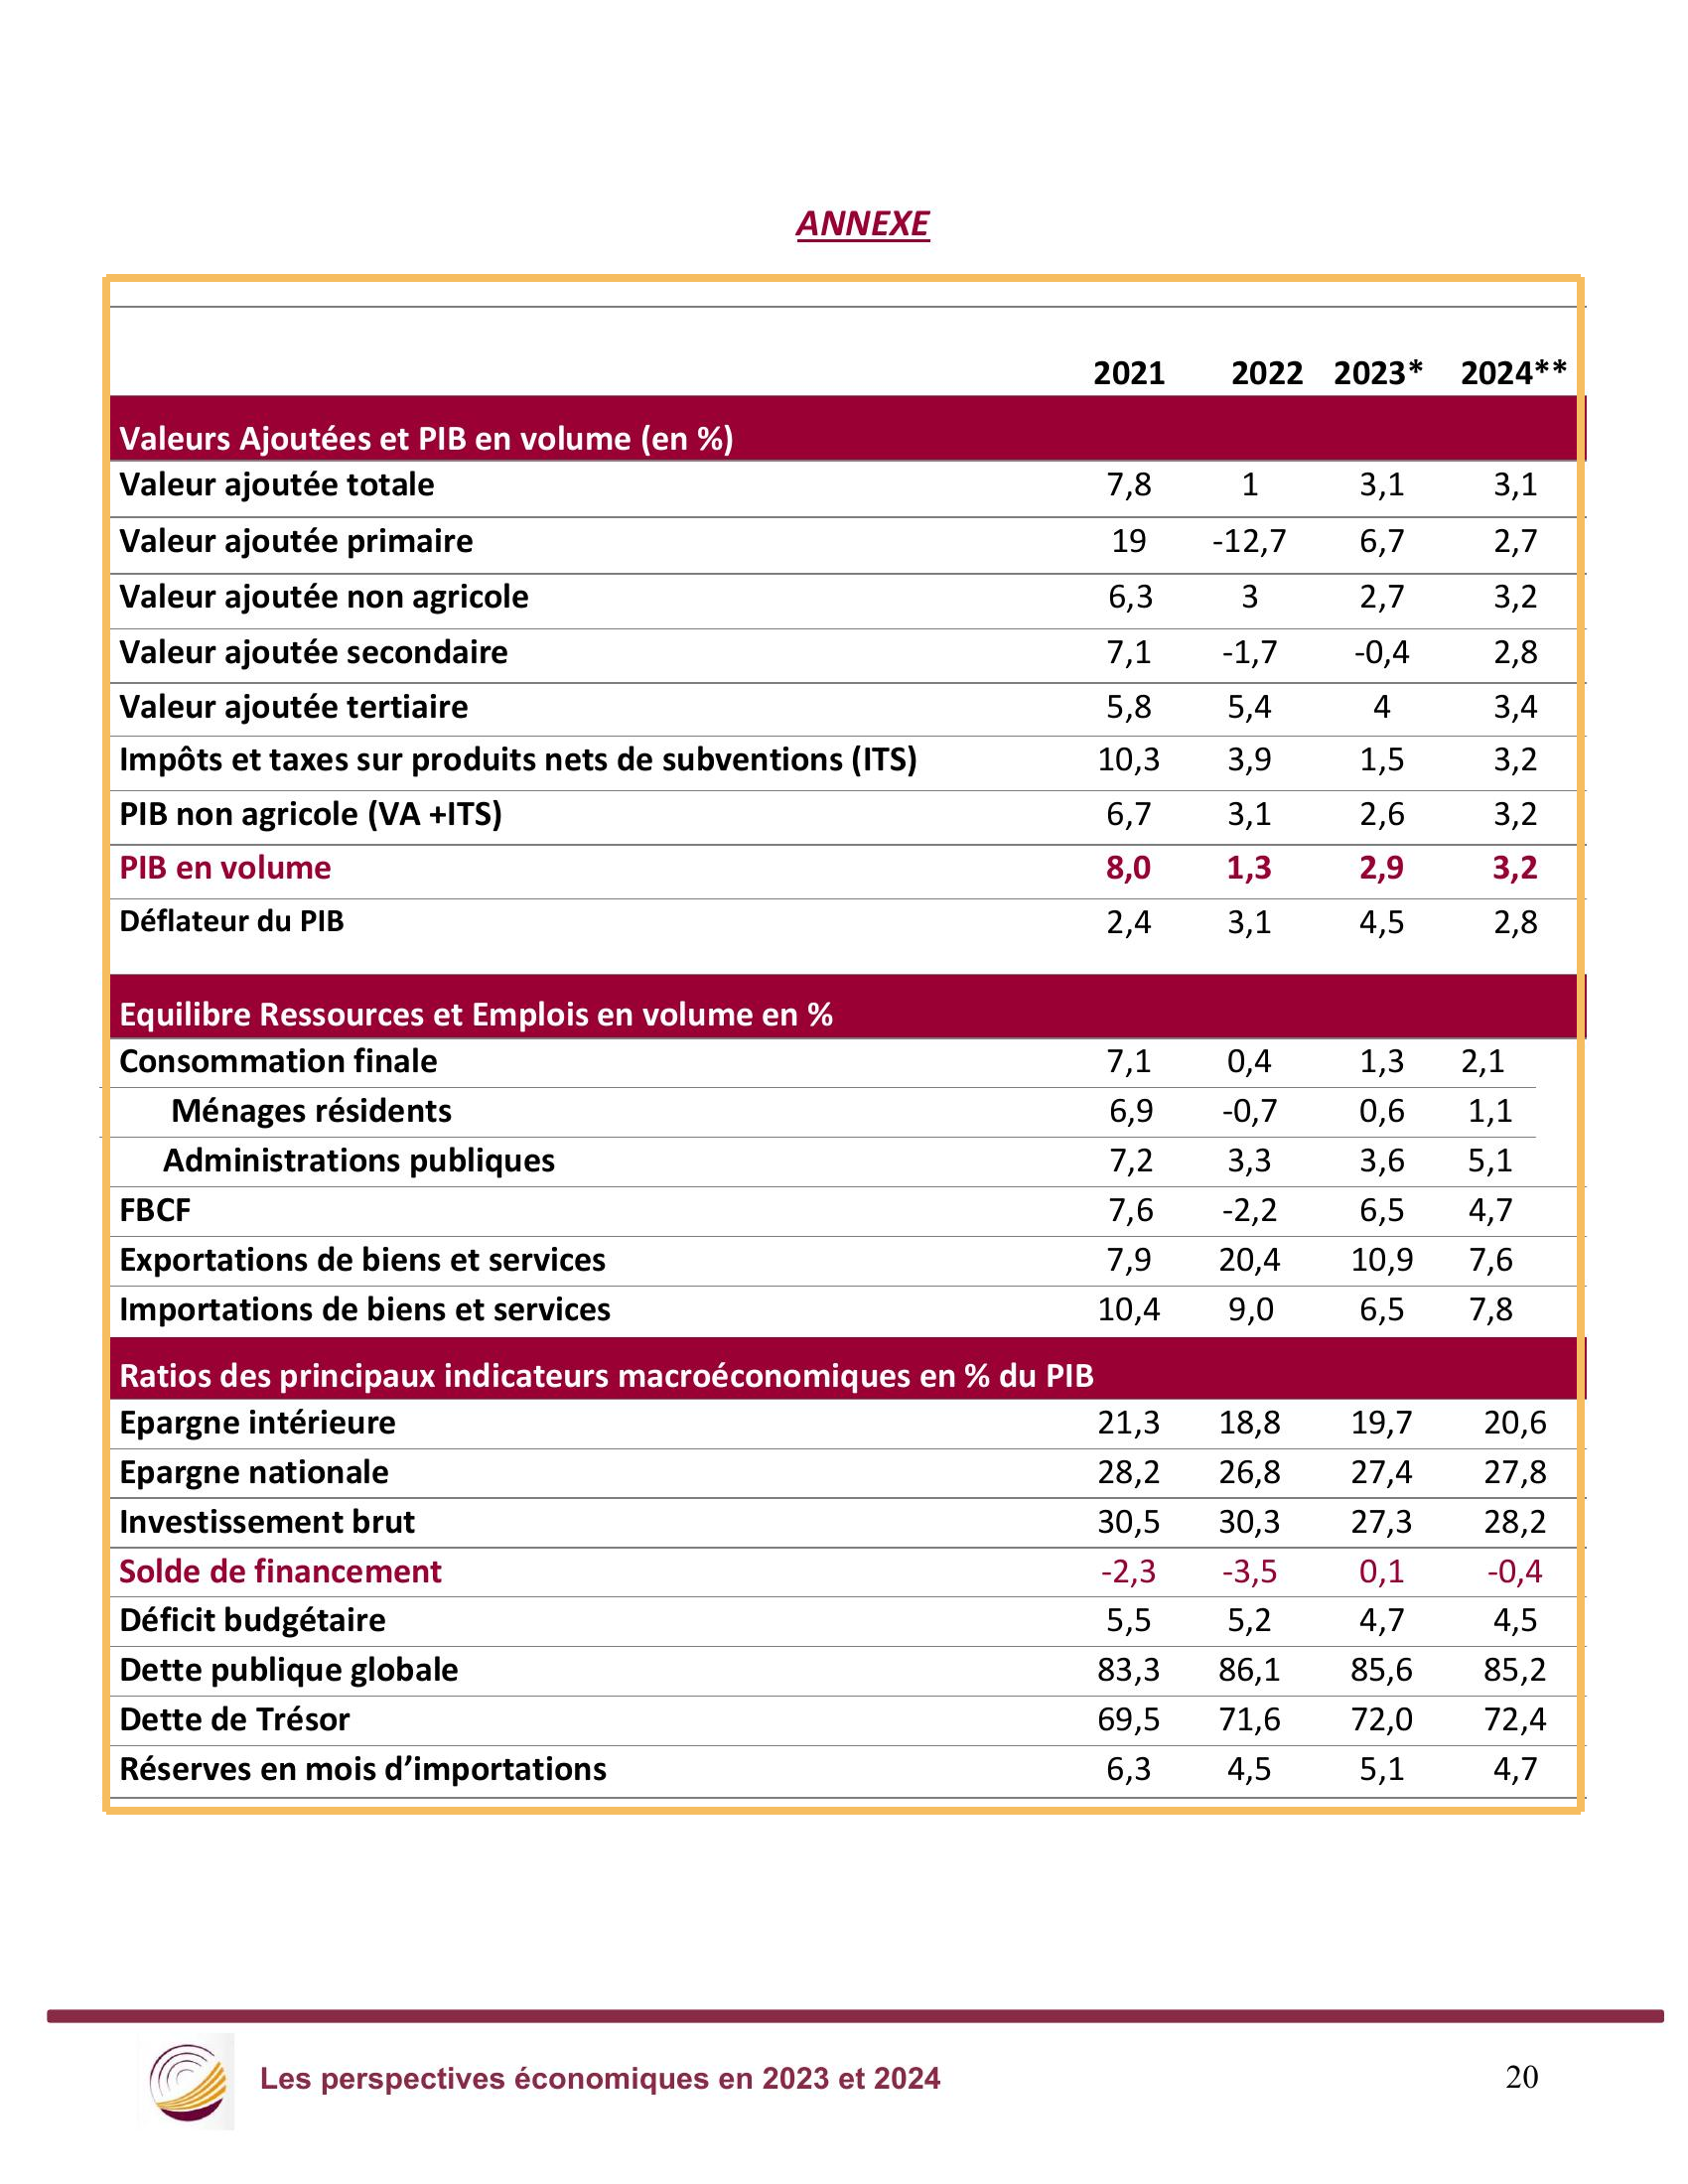

In [ ]:
lp.draw_box(image, layout,)

In [ ]:
text_blocks = lp.Layout([b for b in layout if b.type=="Table"])
text_blocks

Layout(_blocks=[TextBlock(block=Rectangle(x_1=107.44440460205078, y_1=279.161376953125, x_2=1591.5296630859375, y_2=1824.097412109375), text=None, id=None, type=Table, parent=None, next=None, score=0.9507838487625122)], page_data={})

In [ ]:
#figure_blocks = lp.Layout([b for b in layout if b.type=='Figure'])

In [ ]:
#figure_blocks

In [ ]:
#text_blocks = lp.Layout([b for b in text_blocks \
 #                  if not any(b.is_in(b_fig) for b_fig in figure_blocks)])

In [ ]:
h, w = image.shape[:2]

left_interval = lp.Interval(0, w/2*1.05, axis='x').put_on_canvas(image)

left_blocks = text_blocks.filter_by(left_interval, center=True)
left_blocks.sort(key = lambda b:b.coordinates[1])

right_blocks = [b for b in text_blocks if b not in left_blocks]
right_blocks.sort(key = lambda b:b.coordinates[1])

# And finally combine the two list and add the index
# according to the order
text_blocks = lp.Layout([b.set(id = idx) for idx, b in enumerate(left_blocks + right_blocks)])

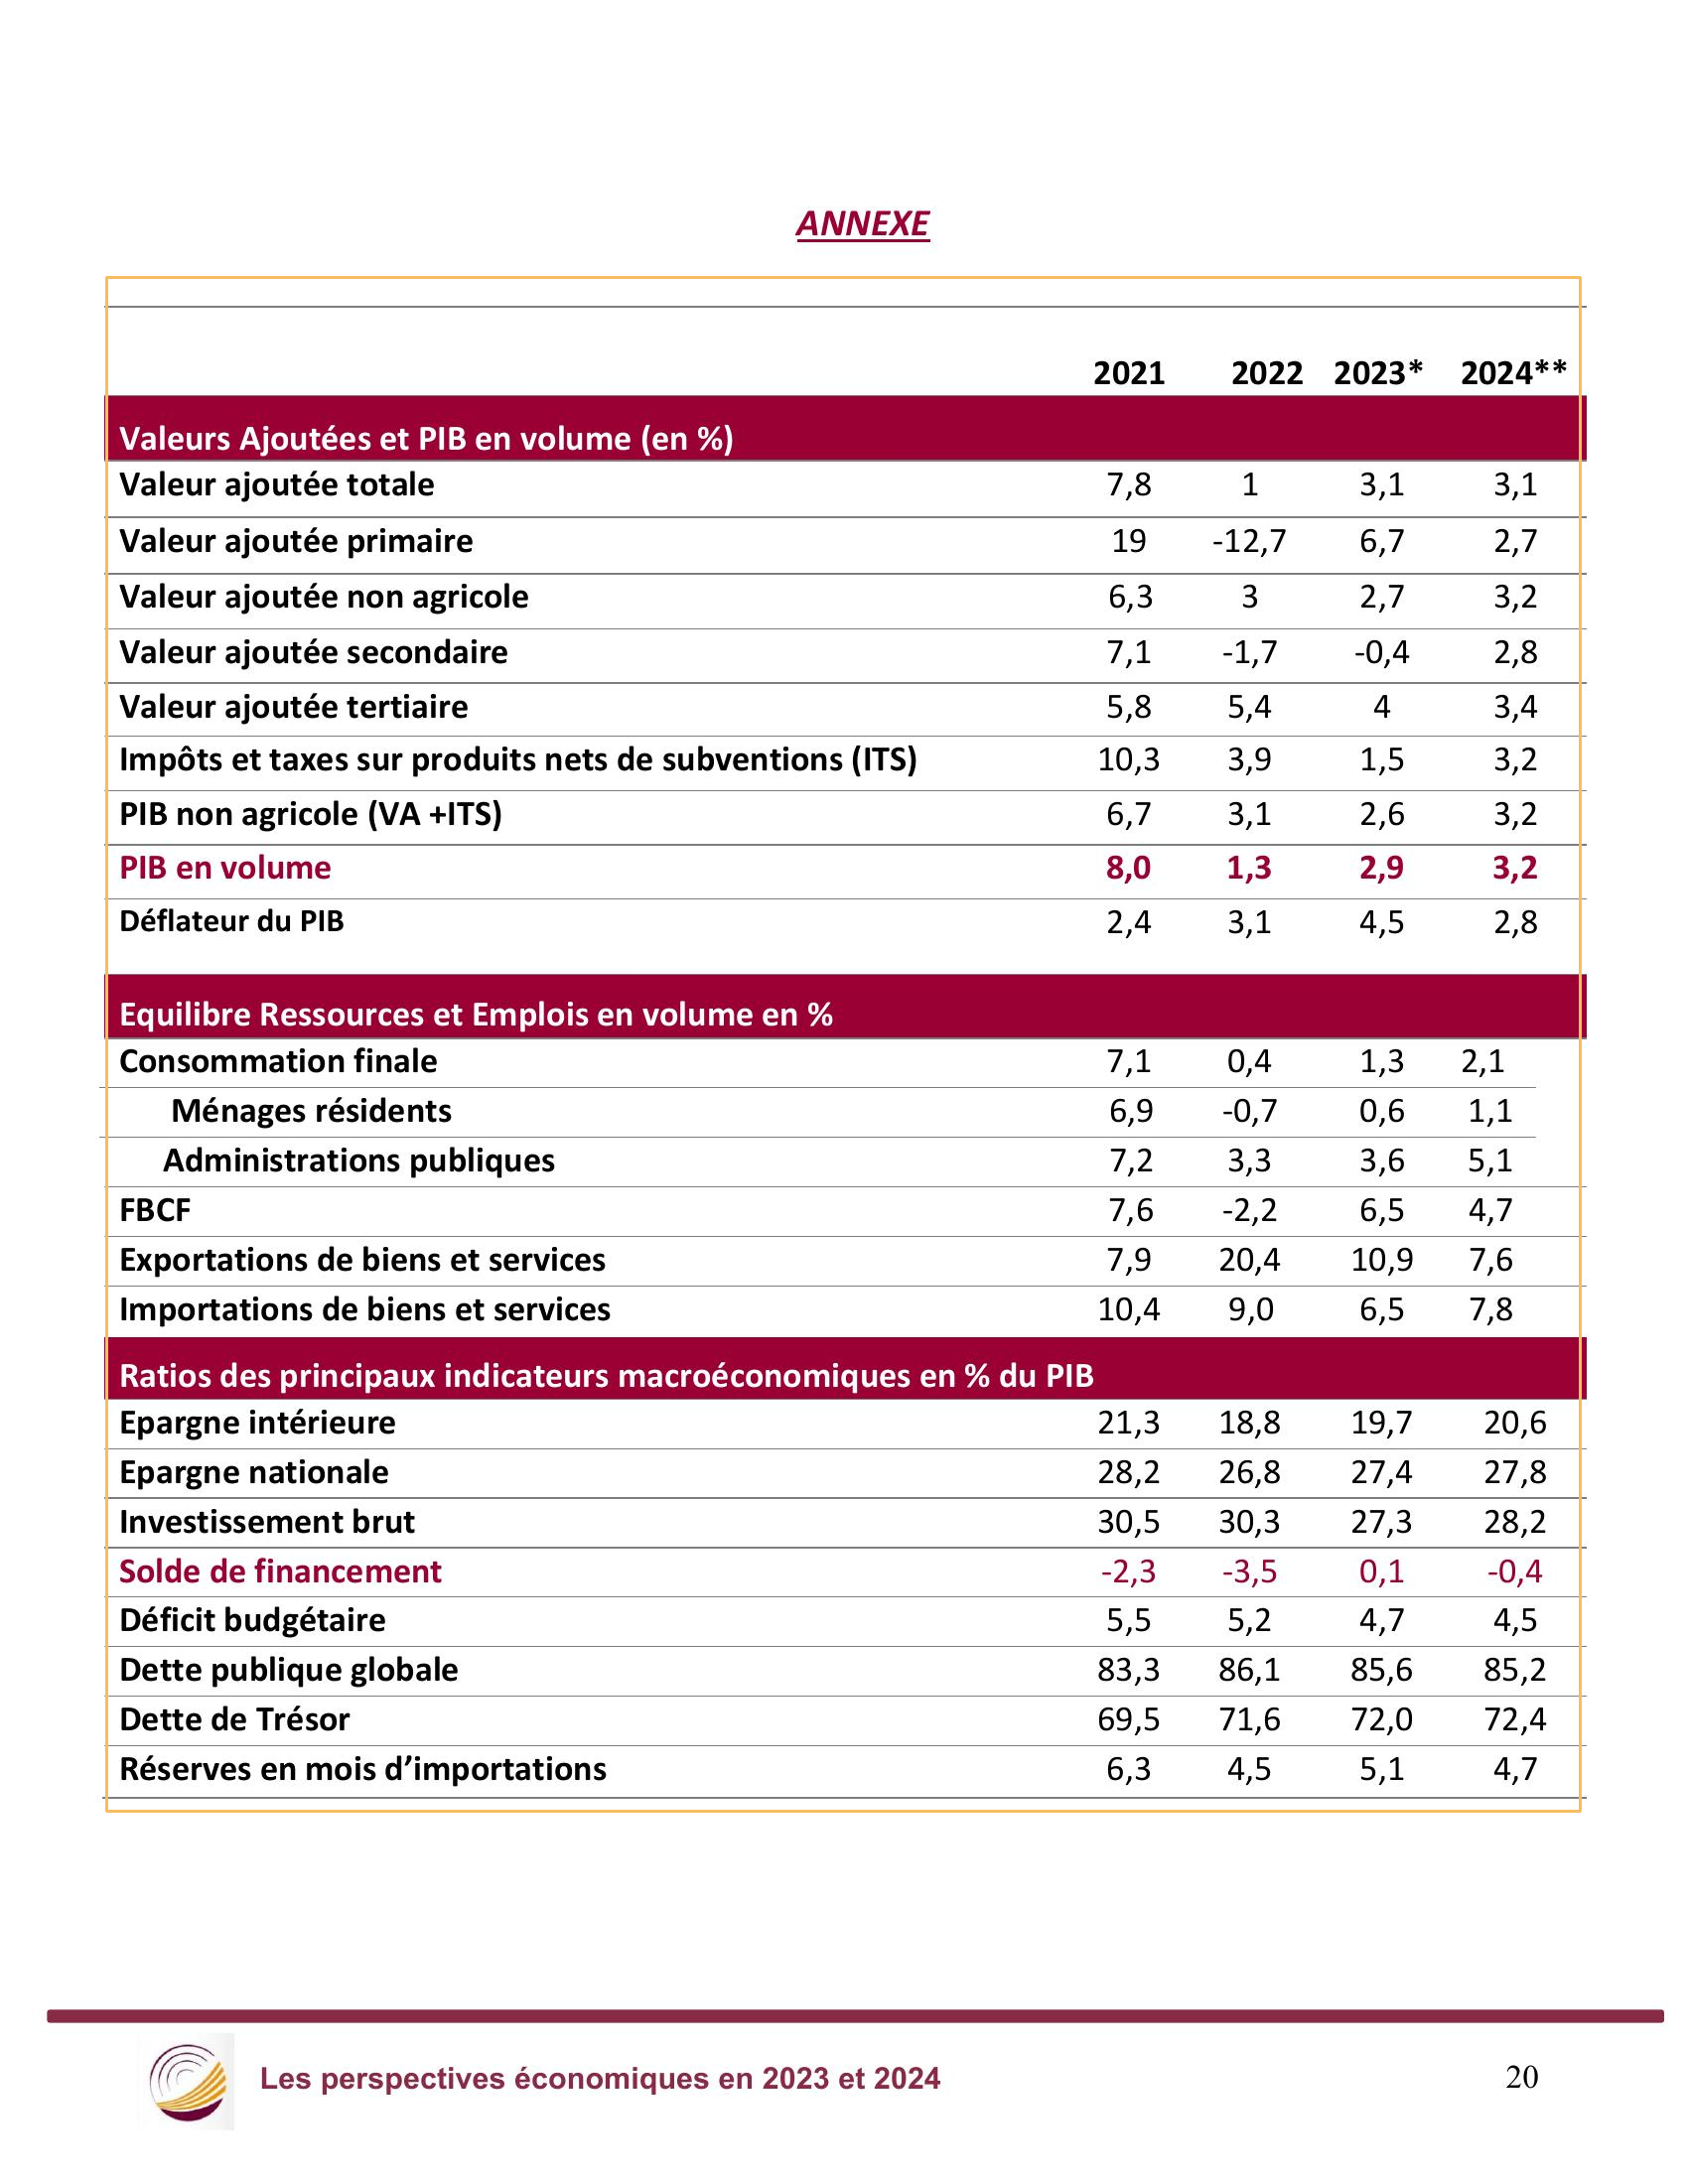

In [ ]:
lp.draw_box(image, text_blocks,
            box_width=3
           # ,show_element_id=True
            )



In [ ]:
%cd /content

/content


In [ ]:
!ls

layout-parser  libssl1.1_1.1.0g-2ubuntu4_amd64.deb  pages  sample_data


In [ ]:
from paddleocr import PaddleOCR, draw_ocr

Extracting the coordinates of the bounding box

In [ ]:
x_1=0
y_1=0
x_2=0
y_2=0

for l in layout:
  #print(l)
  if l.type == 'Table':
    x_1 = int(l.block.x_1)
    print(l.block.x_1)
    y_1 = int(l.block.y_1)
    x_2 = int(l.block.x_2)
    y_2 = int(l.block.y_2)

    break

107.44440460205078


In [ ]:
print(x_1,y_1,x_2,y_2)

107 279 1591 1824


In [ ]:
ls

layout-parser/  libssl1.1_1.1.0g-2ubuntu4_amd64.deb  pages/  sample_data/


In [ ]:
im = cv2.imread('pages/page19.jpg')

In [ ]:
!ls


In [ ]:
!mkdir cropped

Saving the cropped portion of the image

In [ ]:
cv2.imwrite('ext_im1.jpg', im[y_1:y_2,x_1:x_2])

TypeError: 'NoneType' object is not subscriptable

In [ ]:
!ls

ext_im1.jpg  layout-parser  libssl1.1_1.1.0g-2ubuntu4_amd64.deb  pages	sample_data


In [ ]:
%cd /content

/content


In [ ]:
!ls

ext_im1.jpg  layout-parser  libssl1.1_1.1.0g-2ubuntu4_amd64.deb  pages	sample_data


Text recognition

In [ ]:
from paddleocr import PaddleOCR, draw_ocr

In [ ]:
ocr = PaddleOCR(use_gpu=False, lang='en')

download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_det_infer.tar to /root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer/en_PP-OCRv3_det_infer.tar


100%|██████████| 4.00M/4.00M [00:16<00:00, 236kiB/s]


download https://paddleocr.bj.bcebos.com/PP-OCRv4/english/en_PP-OCRv4_rec_infer.tar to /root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer/en_PP-OCRv4_rec_infer.tar


100%|██████████| 10.2M/10.2M [00:17<00:00, 583kiB/s] 


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to /root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer/ch_ppocr_mobile_v2.0_cls_infer.tar


100%|██████████| 2.19M/2.19M [00:15<00:00, 143kiB/s]

[2024/03/14 12:27:49] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_char_dict_path='

In [ ]:
#ocr = PaddleOCR(lang='en')
image_path = '/content/ext_im1.jpg'


In [ ]:
import cv2

In [ ]:
image_cv = cv2.imread(image_path)


In [ ]:
image_height = image_cv.shape[0]


In [ ]:
image_width = image_cv.shape[1]


Perform the OCR on the image

In [ ]:
output = ocr.ocr(image_path)[0]

[2024/03/14 12:31:10] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2024/03/14 12:31:11] ppocr DEBUG: dt_boxes num : 122, elapsed : 0.6969254016876221
[2024/03/14 12:31:17] ppocr DEBUG: rec_res num  : 122, elapsed : 6.390316963195801


In [ ]:
print(output)

[[[[990.0, 77.0], [1070.0, 77.0], [1070.0, 114.0], [990.0, 114.0]], ('2021', 0.999800980091095)], [[[1128.0, 79.0], [1211.0, 75.0], [1213.0, 111.0], [1130.0, 115.0]], ('2022', 0.9999055862426758)], [[[1230.0, 77.0], [1334.0, 77.0], [1334.0, 111.0], [1230.0, 111.0]], ('2023*', 0.9979995489120483)], [[[1359.0, 78.0], [1474.0, 74.0], [1475.0, 109.0], [1360.0, 113.0]], ('2024**', 0.9999628067016602)], [[[13.0, 146.0], [627.0, 148.0], [627.0, 177.0], [13.0, 175.0]], ('Valeurs Ajoutees et PlB en volume (en %', 0.9221368432044983)], [[[13.0, 193.0], [329.0, 193.0], [329.0, 225.0], [13.0, 225.0]], ('Valeur ajoutee totale', 0.9960885643959045)], [[[1003.0, 190.0], [1059.0, 190.0], [1059.0, 229.0], [1003.0, 229.0]], ('7,8', 0.9966369271278381)], [[[1137.0, 192.0], [1166.0, 192.0], [1166.0, 225.0], [1137.0, 225.0]], ('1', 0.9993108510971069)], [[[1257.0, 190.0], [1311.0, 190.0], [1311.0, 229.0], [1257.0, 229.0]], ('3,1', 0.994358241558075)], [[[1393.0, 190.0], [1447.0, 190.0], [1447.0, 230.0], [1

extracting information from the OCR output stored in the variable output. Here's what each line of your code does:

**boxes:** Extracts the bounding boxes of the detected text from the OCR output.
**texts:** Extracts the recognized text from the OCR output.
**probabilities:** Extracts the confidence scores (probabilities) associated with the recognized text from the OCR output.

In [ ]:
boxes = [line[0] for line in output]
texts = [line[1][0] for line in output]
probabilities = [line[1][1] for line in output]

In [ ]:

image_boxes = image_cv.copy()


This code is iterating through the detected bounding boxes (boxes) and corresponding text (texts) obtained from OCR. For each bounding box and corresponding text, it draws a rectangle around the bounding box and annotates the image with the detected text using OpenCV functions

In [ ]:
for box,text in zip(boxes,texts):
  cv2.rectangle(image_boxes, (int(box[0][0]),int(box[0][1])), (int(box[2][0]),int(box[2][1])),(0,0,255),1)
  cv2.putText(image_boxes, text,(int(box[0][0]),int(box[0][1])),cv2.FONT_HERSHEY_SIMPLEX,1,(222,0,0),1)

In [ ]:
cv2.imwrite('/content/detections1.jpg', image_boxes)

True

Reconstruction

Get Horizontal and Vertical Lines

In [ ]:
im = image_cv.copy()

In [ ]:
horiz_boxes = []
vert_boxes = []

for box in boxes:
  x_h, x_v = 0,int(box[0][0])
  y_h, y_v = int(box[0][1]),0
  width_h,width_v = image_width, int(box[2][0]-box[0][0])
  height_h,height_v = int(box[2][1]-box[0][1]),image_height

  horiz_boxes.append([x_h,y_h,x_h+width_h,y_h+height_h])
  vert_boxes.append([x_v,y_v,x_v+width_v,y_v+height_v])

  cv2.rectangle(im,(x_h,y_h), (x_h+width_h,y_h+height_h),(0,0,255),1)
  cv2.rectangle(im,(x_v,y_v), (x_v+width_v,y_v+height_v),(0,255,0),1)


In [ ]:
cv2.imwrite('/content/horiz_vert1.jpg',im)

True

Non-Max Suppression

In [ ]:
import tensorflow as tf

In [ ]:
horiz_out = tf.image.non_max_suppression(
    horiz_boxes,
    probabilities,
    max_output_size = 1000,
    iou_threshold=0.1,
    score_threshold=float('-inf'),
    name=None
)

In [ ]:
import numpy as np

The indices of the selected horizontal bounding boxes in sorted order

In [ ]:
horiz_lines = np.sort(np.array(horiz_out))
print(horiz_lines)

[  3   4   7  11  17  20  28  33  37  42  48  50  55  57  61  66  74  80
  81  83  87  93  98 103 110 114 118]


In [ ]:
im_nms = image_cv.copy()

In [ ]:
for val in horiz_lines:
  cv2.rectangle(im_nms, (int(horiz_boxes[val][0]),int(horiz_boxes[val][1])), (int(horiz_boxes[val][2]),int(horiz_boxes[val][3])),(0,0,255),1)


In [ ]:
cv2.imwrite('/content/im_nms1.jpg',im_nms)

True

In [ ]:
vert_out = tf.image.non_max_suppression(
    vert_boxes,
    probabilities,
    max_output_size = 1000,
    iou_threshold=0.1,
    score_threshold=float('-inf'),
    name=None
)

In [ ]:
print(vert_out)

tf.Tensor([ 3  1  0 28 87], shape=(5,), dtype=int32)


In [ ]:
vert_lines = np.sort(np.array(vert_out))
print(vert_lines)

[ 0  1  3 28 87]


In [ ]:
for val in vert_lines:
  cv2.rectangle(im_nms, (int(vert_boxes[val][0]),int(vert_boxes[val][1])), (int(vert_boxes[val][2]),int(vert_boxes[val][3])),(255,0,0),1)


In [ ]:
cv2.imwrite('/content/im_nms.jpg',im_nms)

True

Convert to CSV

In [ ]:


out_array = [["" for i in range(len(vert_lines))] for j in range(len(horiz_lines))]
print(np.array(out_array).shape)
print(out_array)

(27, 5)
[['', '', '', '', ''], ['', '', '', '', ''], ['', '', '', '', ''], ['', '', '', '', ''], ['', '', '', '', ''], ['', '', '', '', ''], ['', '', '', '', ''], ['', '', '', '', ''], ['', '', '', '', ''], ['', '', '', '', ''], ['', '', '', '', ''], ['', '', '', '', ''], ['', '', '', '', ''], ['', '', '', '', ''], ['', '', '', '', ''], ['', '', '', '', ''], ['', '', '', '', ''], ['', '', '', '', ''], ['', '', '', '', ''], ['', '', '', '', ''], ['', '', '', '', ''], ['', '', '', '', ''], ['', '', '', '', ''], ['', '', '', '', ''], ['', '', '', '', ''], ['', '', '', '', ''], ['', '', '', '', '']]


In [ ]:

unordered_boxes = []

for i in vert_lines:
  print(vert_boxes[i])
  unordered_boxes.append(vert_boxes[i][0])

[990, 0, 1070, 1545]
[1128, 0, 1213, 1545]
[1359, 0, 1475, 1545]
[1268, 0, 1302, 1545]
[9, 0, 286, 1545]


In [ ]:
ordered_boxes = np.argsort(unordered_boxes)
print(ordered_boxes)

[4 0 1 3 2]


In [ ]:
def intersection(box_1, box_2):
  return [box_2[0], box_1[1],box_2[2], box_1[3]]

In [ ]:
def iou(box_1, box_2):

  x_1 = max(box_1[0], box_2[0])
  y_1 = max(box_1[1], box_2[1])
  x_2 = min(box_1[2], box_2[2])
  y_2 = min(box_1[3], box_2[3])

  inter = abs(max((x_2 - x_1, 0)) * max((y_2 - y_1), 0))
  if inter == 0:
      return 0

  box_1_area = abs((box_1[2] - box_1[0]) * (box_1[3] - box_1[1]))
  box_2_area = abs((box_2[2] - box_2[0]) * (box_2[3] - box_2[1]))

  return inter / float(box_1_area + box_2_area - inter)

In [ ]:
for i in range(len(horiz_lines)):
  for j in range(len(vert_lines)):
    resultant = intersection(horiz_boxes[horiz_lines[i]], vert_boxes[vert_lines[ordered_boxes[j]]] )

    for b in range(len(boxes)):
      the_box = [boxes[b][0][0],boxes[b][0][1],boxes[b][2][0],boxes[b][2][1]]
      if(iou(resultant,the_box)>0.1):
        out_array[i][j] = texts[b]

In [ ]:
out_array=np.array(out_array)

In [ ]:
out_array

array([['', '2021', '2022', '2023*', '2024**'],
       ['Valeurs Ajoutees et PlB en volume (en %', '', '', '', ''],
       ['Valeur ajoutee totale', '7,8', '1', '3,1', '3,1'],
       ['Valeur ajoutee primaire', '19', '-12,7', '6,7', '2,7'],
       ['Valeur ajoutee non agricole', '6,3', '3', '2,7', '3,2'],
       ['Valeur ajoutee secondaire', '7,1', '-1,7', '-0,4', '2,8'],
       ['Valeur ajoutee tertiaire', '5,8', '5,4', '4', '3,4'],
       ['Impots et taxes sur produits nets de subventions (ITs)', '10,3',
        '3,9', '1,5', '3,2'],
       ['PIB non agricole (VA +ITS)', '6,7', '3,1', '2,6', '3,2'],
       ['PIB en volume', '8,0', '1,3', '2,9', '3,2'],
       ['Deflateur du PIB', '2,4', '3,1', '4,5', '2,8'],
       ['Equilibre Ressources et Emplois en volume en %', '', '', '', ''],
       ['Consommation finale', '7,1', '0,4', '1,3', '2,1'],
       ['Menages residents', '6,9', '-0,7', '0,6', '1,1'],
       ['Administrations publiques', '7,2', '3,3', '3,6', '5,1'],
       ['FBCF', '7,6

In [ ]:
import pandas as pd

In [ ]:
pd.DataFrame(out_array).to_csv('sample.csv')

In [ ]:
pd.DataFrame(out_array).to_excel('sample.xlsx')